## Exercise 3.3

Write code that filters an input signal using MATLAB functions filter(), fir1(), fir2(), remez(). Your filter should be low-pass with cutoff frequency $f_c=f_1$. Save filtered signal to WAVE file. Plot the spectrograms of signal before and after filtering.

NOTE: 
SciPy analogs of corresponding MATLAB functions are given in the table below:

| MATLAB  |   SciPy   |
|---------|-----------|
|  fir1   |  firwin1  |
|  fir2   |  firwin2  |
|  remez  |  remez    |
| filter  |  lfilter  |


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = 0.6
fs = 16000

sample_count = int(t * fs)

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


In [3]:
plot_samples = 512

kernel_size = 213
cutoff = 2 * freqs[0] / fs

def plot_kernel_and_filtered(h, filtered):
    plt.subplots(2, 2, figsize=(11, 3))

    plt.subplot(121)
    plt.plot(np.abs(h))
    plt.xlim([-10, h.size + 10])
    plt.ylim([-0.1, 1.1])
    plt.grid()

    plt.subplot(222)
    plt.plot(s[:plot_samples])
    plt.grid()

    plt.subplot(224)
    plt.plot(filtered[:plot_samples])
    plt.grid()


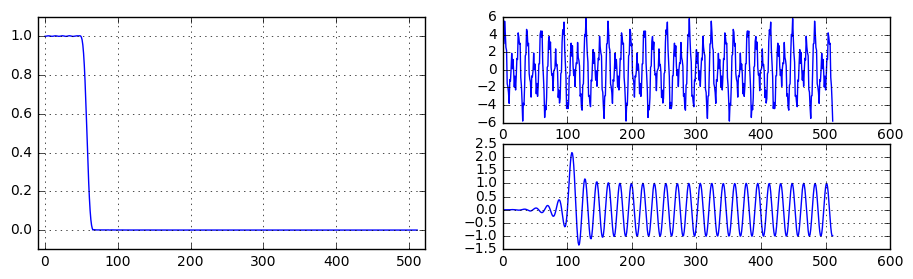

In [4]:
# firwin()

kernel1 = sig.firwin(kernel_size, cutoff)
w1, h1 = sig.freqz(kernel1)

filtered1 = sig.lfilter(kernel1, [1], s)

plot_kernel_and_filtered(h1, filtered1)


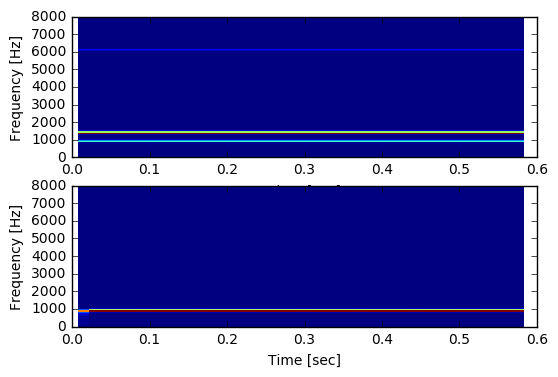

In [5]:
plt.subplot(211)
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(212)
f, t, Sxx = sig.spectrogram(filtered1, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')


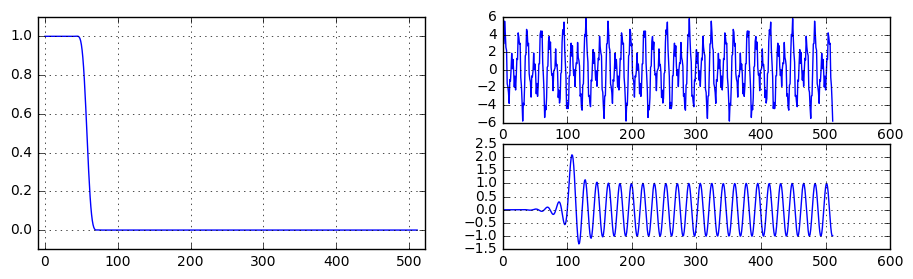

In [6]:
# firwin2()

kernel2 = sig.firwin2(kernel_size, [0.0, cutoff - 0.01, cutoff + 0.01, 1.0], [1.0, 1.0, 0.0, 0.0])

w2, h2 = sig.freqz(kernel2)
filtered2 = sig.lfilter(kernel2, [1], s)

plot_kernel_and_filtered(h2, filtered2)


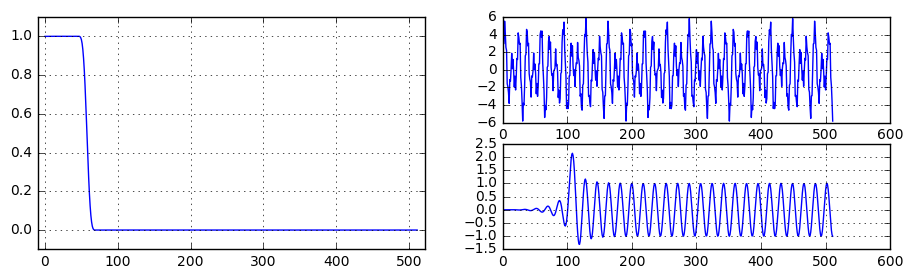

In [7]:
# remez()

kernel3 = sig.remez(kernel_size + 1, [0, cutoff / 2 - 0.01, cutoff / 2 + 0.01, 0.5], [1.0, 0.0])

w3, h3 = sig.freqz(kernel3)
filtered3 = sig.lfilter(kernel3, [1], s)

plot_kernel_and_filtered(h3, filtered3)
